In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [10]:
X,y=make_classification(n_samples=150,n_features=2,n_informative=2,n_redundant=0,n_classes=3,n_clusters_per_class=1,class_sep=2,random_state=42)

In [11]:
y_onehot=np.zeros((y.size,y.max()+1))
y_onehot[np.arange(y.size),y]=1


In [12]:
def softmax(z):
    exp_z=np.exp(z-np.max(z))
    return exp_z / np.sum(exp_z)

In [13]:
def softmax_perceptron(X, Y, lr=0.1, epochs=1000):
    n_samples, n_features = X.shape
    n_classes = Y.shape[1]

    # initialize weights and bias
    W = np.zeros((n_classes, n_features))
    b = np.zeros(n_classes)

    for _ in range(epochs):
        for i in range(n_samples):
            z = np.dot(W, X[i]) + b
            y_hat = softmax(z)
            error = Y[i] - y_hat

            # update weights and bias
            W += lr * np.outer(error, X[i])
            b += lr * error

    return W, b

In [14]:
def predict(X, W, b):
    y_pred = []
    for i in range(X.shape[0]):
        z = np.dot(W, X[i]) + b
        y_pred.append(np.argmax(softmax(z)))
    return np.array(y_pred)

Weights:
 [[-4.13566481  2.82949801]
 [ 5.33415729  2.5083523 ]
 [-1.19849247 -5.33785031]]
Bias:
 [-0.22827278 -3.33433596  3.56260874]
Accuracy: 1.0


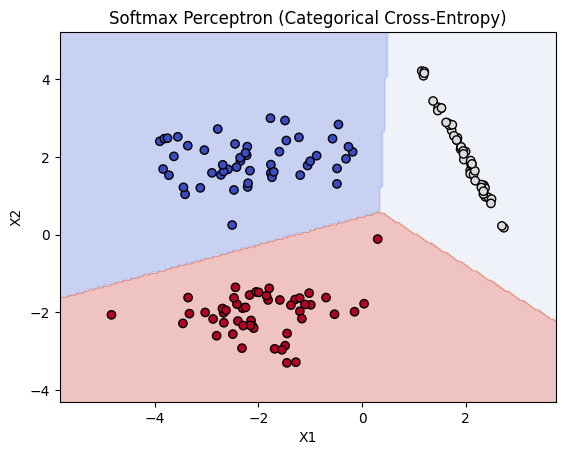

In [16]:
W, b = softmax_perceptron(X, y_onehot, lr=0.1, epochs=1000)
y_pred = predict(X, W, b)
accuracy = np.mean(y_pred == y)
print("Weights:\n", W)
print("Bias:\n", b)
print("Accuracy:", accuracy)

# --------------------------
# 6. Plot decision regions (for 2D only)
# --------------------------
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid, W, b).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Softmax Perceptron (Categorical Cross-Entropy)")
plt.show()